# Implementation of Black–Scholes–Merton-model

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization
from scipy.stats import norm
from scipy import stats
from numpy import log, exp, sqrt

C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\kroep\anaconda3\envs\standard_env\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def calculate_call_option_price(S, E, T, rf, sigma):
    """
    Calculate the price of a call option using the Black-Scholes model.
    
    Args:
        S (float): The current price of the underlying asset.
        E (float): The strike price of the option.
        T (float): The time to expiration of the option, in years.
        rf (float): The risk-free interest rate.
        sigma (float): The volatility of the underlying asset.

    Returns:
        The price of the call option.
    """
    # First we have to calculate d1 and d2 parameters
    d1 = (log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)

    print("The d1 and d2 parameters: {}, {}".format(round(d1,3), round(d2,3)))

    # Use the N(x) to calculate the price of the option
    return S * stats.norm.cdf(d1) - E * exp(-rf * T) * stats.norm.cdf(d2)

def calculate_put_option_price(S, E, T, rf, sigma):
    """
    Calculate the price of a put option using the Black-Scholes model.
    
    Args:
        S (float): The current price of the underlying asset.
        E (float): The strike price of the option.
        T (float): The time to expiration of the option, in years.
        rf (float): The risk-free interest rate.
        sigma (float): The volatility of the underlying asset.

    Returns:
        The price of the put option.
    """
    # First we have to calculate d1 and d2 parameters
    d1 = (log(S / E) + (rf + sigma * sigma / 2.0) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)

    print("The d1 and d2 parameters: {}, {}".format(round(d1,3), round(d2,3)))

    # Use the N(x) to calculate the price of the option
    return -S * stats.norm.cdf(-d1) + E * exp(-rf * T) * stats.norm.cdf(-d2)

In [3]:
# Underlying stock price at t=0
S0 = 100
# Strike price
E = 100
# Time to expiration (in years)
T = 1
# Risk-free interest rate
rf = 0.05
# Volatility of the underlying stock
sigma = 0.2

print("Call option price according to Black-Scholes model: ",
      round(calculate_call_option_price(S0, E, T, rf, sigma), 3))
print("Put option price according to Black-Scholes model: ",
      round(calculate_put_option_price(S0, E, T, rf, sigma), 3))

The d1 and d2 parameters: 0.35, 0.15
Call option price according to Black-Scholes model:  10.451
The d1 and d2 parameters: 0.35, 0.15
Put option price according to Black-Scholes model:  5.574


In [4]:
def get_yf_stock_data(name: str, start: str, end: str):
    """
    Download stock data from Yahoo Finance.

    Args:
        name (str): The ticker symbol for the stock.
        start (str): The starting date for the data.
        end (str): The ending date for the data.

    Returns:
        A pandas Series of closing prices.
    """
    ticker = yf.Ticker(name)
    return ticker.history(start=start, end=end)['Close']

def plot_stock_data(data, title: str):
    """
    Plot the stock data.

    Args:
        data (pd.core.series.Series): A pandas Series of closing prices.
        title (str): The title for the plot.

    Returns:
        None. Displays a plot of the data.
    """
    if isinstance(data, pd.core.series.Series):
        data.plot(figsize=(10, 5), title=title)
    else:
        print('Unable to plot! Input must be of type pd.core.series.Series.')

def calculate_return(data):
    """
    Calculate the logarithmic return of the stock data.

    Args:
        data (pd.core.series.Series): A pandas Series of closing prices.

    Returns:
        A pandas Series of logarithmic returns.
    """
    # NORMALIZATION - to measure all variables in a comparable metric
    log_return = np.log(data / data.shift(1))
    return log_return[1:]

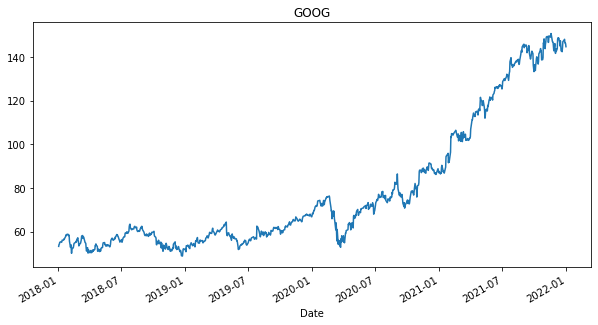

In [5]:
# Define the start and end dates, and the ticker symbol for the stock
start = '2018-01-01'
end = '2022-01-01'
stock_yf_name = 'GOOG'

# Download the data and plot it
google_data = get_yf_stock_data(stock_yf_name, start=start, end=end)
plot_stock_data(google_data, stock_yf_name)

mu: -0.091
sigma: 1.375


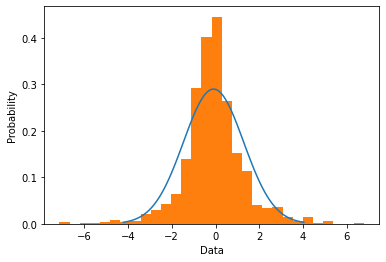

In [6]:
# Convert the pandas Series to a list
google_data_list = google_data.to_list()

# Compute the differences between successive elements of the list
diff_list = [google_data_list[i] - google_data_list[i+1] for i in range(len(google_data_list) - 1)]

# Calculate the mean and standard deviation of the differences
mu = np.mean(diff_list)
sigma = np.sqrt(np.var(diff_list))
print(f'mu: {round(mu,3)}\nsigma: {round(sigma,3)}')

# Generate a range of values from 'mu - 3*sigma' to 'mu + 3*sigma'
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Plot the normal distribution with mean 'mu' and standard deviation 'sigma'
plt.plot(x, stats.norm.pdf(x, mu, sigma))

# Plot a histogram of the differences
plt.hist(diff_list, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

# Show the plot
plt.show()

The code from the following link served as a template for my code. I mostly did it the same and only changed minor things when it comes to the procedure: https://kevinpmooney.blogspot.com/2017/07/calculating-implied-volatility-from.html

In [7]:
# Define a function to calculate d1 and d2 values used in Black-Scholes formula
def calculate_d_values(sigma, S, K, r, t):
    """
    Args:
        sigma: implied volatility
        S: spot price of the underlying asset
        K: strike price of the option
        r: risk-free interest rate
        t: time to expiration expressed in years
    Returns:
        Tuple containing values of d1 and d2.
    """
    d1 = (log(S/K) + (r + sigma**2/2) * t) / (sigma * sqrt(t))
    d2 = d1 - sigma * sqrt(t)
    return d1, d2

# Define a function to calculate the call option price
def calculate_call_price(sigma, S, K, r, t, d1, d2):
    """
    Args:
        sigma: implied volatility
        S: spot price of the underlying asset
        K: strike price of the option
        r: risk-free interest rate
        t: time to expiration expressed in years
        d1, d2: Intermediate variables in the Black-Scholes formula
    Returns:
        Call option price.
    """
    C = norm.cdf(d1) * S - norm.cdf(d2) * K * exp(-r * t)
    return C

In [8]:
# Initialize the option and market parameters
S = 100.0  # Spot price
K = 105.0  # Strike price
r = 0.01  # Risk-free interest rate
t = 30.0/365  # Time to expiration (years)
C0 = 2.30  # Actual market price of the option

# Start with an initial guess for the implied volatility
vol = 0.5

epsilon = 1.0  # Variable to check stopping conditions
abstol = 1e-4  # Stop calculation when abs(epsilon) < this number

i = 0   # Variable to count number of iterations
max_iter = 1e3  # Max number of iterations before aborting

# Iteratively compute the implied volatility
while epsilon > abstol:
    if i > max_iter:
        # Avoid infinite loop, break if max iterations reached
        break

    i += 1
    d1, d2 = calculate_d_values(vol, S, K, r, t)
    function_value = calculate_call_price(vol, S, K, r, t, d1, d2) - C0
    vega = S * norm.pdf(d1) * sqrt(t)  # Vega is the derivative of the option price w.r.t. volatility
    vol -= function_value / vega
    epsilon = abs(function_value)

print('Implied volatility = ', round(vol, 5))
print('Code required', i, 'iterations.')

Implied volatility =  0.36886
Code required 3 iterations.
